In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine

In [11]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Question 1<br>
Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

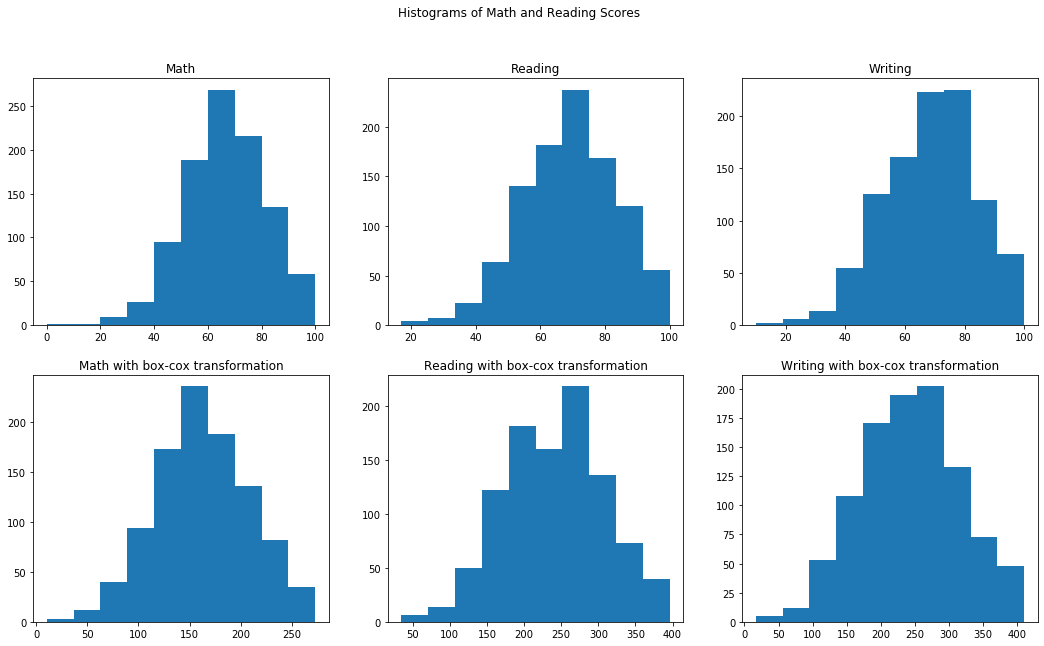

In [15]:
# Excluding math scores of 0 for box-cox
m_box,_ = boxcox(df[df['math score'] > 0]['math score'])
r_box,_ = boxcox(df['reading score'])
w_box,_ = boxcox(df['writing score'])

plt.figure(figsize=(18,10))

plt.subplot(2, 3, 1)
plt.hist(df['math score'])
plt.title('Math')

plt.subplot(2, 3, 2)
plt.hist(df['reading score'])
plt.title('Reading')

plt.subplot(2, 3, 3)
plt.hist(df['writing score'])
plt.title('Writing')

plt.subplot(2, 3, 4)
plt.hist(m_box)
plt.title('Math with box-cox transformation')

plt.subplot(2, 3, 5)
plt.hist(r_box)
plt.title('Reading with box-cox transformation')

plt.subplot(2, 3, 6)
plt.hist(w_box)
plt.title('Writing with box-cox transformation')

plt.suptitle('Histograms of Math and Reading Scores')
plt.show()

In [19]:
jb_math = jarque_bera(df['math score'])
norm_math = normaltest(df['math score'])

print('Math Normal')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_math[0], jb_math[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_math[0], norm_math[1]))

jb_math_box = jarque_bera(m_box)
norm_math_box = normaltest(m_box)

print('Math Box-Cox')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_math_box[0], jb_math_box[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_math_box[0], norm_math_box[1]))

jb_read = jarque_bera(df['reading score'])
norm_read = normaltest(df['reading score'])

print('Reading Normal')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_read[0], jb_read[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_read[0], norm_read[1]))

jb_read_box = jarque_bera(r_box)
norm_read_box = normaltest(r_box)

print('Reading Box-Cox')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_read_box[0], jb_read_box[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_read_box[0], norm_read_box[1]))

jb_writ = jarque_bera(df['writing score'])
norm_writ = normaltest(df['writing score'])

print('Writing Normal')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_writ[0], jb_writ[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_writ[0], norm_writ[1]))

jb_writ_box = jarque_bera(w_box)
norm_writ_box = normaltest(w_box)

print('Writing Box-Cox')
print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_writ_box[0], jb_writ_box[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_writ_box[0], norm_writ_box[1]))

Math Normal
Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Math Box-Cox
Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Reading Normal
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Reading Box-Cox
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.28227460696581 and p value is 0.07128015626992969
Writing Normal
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974
Writing Box-Cox
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.093

Applying the Box-Cox Normalizes the data.  Without the transformation the data is not evenly distributed.  The Jarque-Bera test shows that it is normalized after the transformation.

Question 2<br>
Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

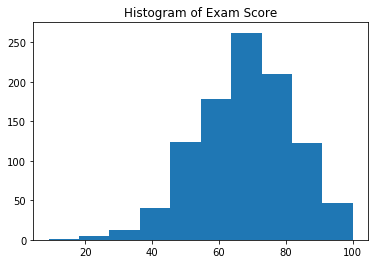

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [20]:
exam = (df['math score'] + df['reading score'] + df['writing score'])/3

plt.hist(exam)
plt.title('Histogram of Exam Score')
plt.show()

jb_exam = jarque_bera(exam)
norm_exam = normaltest(exam)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_exam[0], jb_exam[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_exam[0], norm_exam[1]))

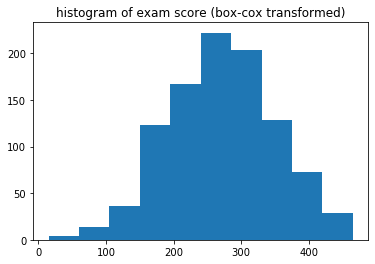

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [22]:
exam_box,_ = boxcox(exam)

plt.hist(exam_box)
plt.title('histogram of exam score (box-cox transformed)')
plt.show()

jb_exam_box = jarque_bera(exam_box)
norm_exam_box = normaltest(exam_box)

print('Jarque-Bera test statistics is {0} and p value is {1}'.format(jb_exam_box[0], jb_exam_box[1]))
print('Normality test statistics is {0} and p value is {1}'.format(norm_exam_box[0], norm_exam_box[1]))

With the new variable not being normaly distributed applying the Box-Cox Transformation accomplishes the task.  This is confirmed with the Jarque-Bera and Normality tests.

Question 3<br>
Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

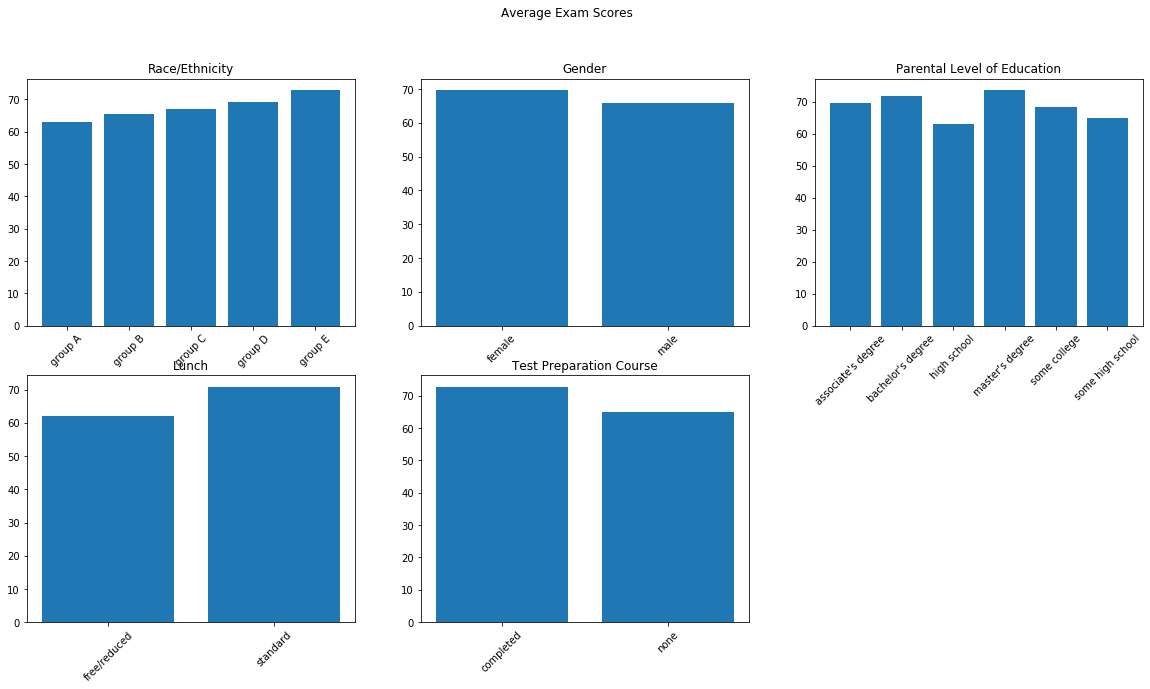

In [27]:
df['exam'] = exam

plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.bar(df.groupby('race/ethnicity')
        ['exam'].mean().index, df.groupby('race/ethnicity')['exam'].mean())

plt.title('Race/Ethnicity')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
plt.bar(df.groupby('gender')
        ['exam'].mean().index, df.groupby('gender')['exam'].mean())

plt.title('Gender')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
plt.bar(df.groupby('parental level of education')
        ['exam'].mean().index, df.groupby('parental level of education')['exam'].mean())

plt.title('Parental Level of Education')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
plt.bar(df.groupby('lunch')
        ['exam'].mean().index, df.groupby('lunch')['exam'].mean())

plt.title('Lunch')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
plt.bar(df.groupby('test preparation course')
        ['exam'].mean().index, df.groupby('test preparation course')['exam'].mean())

plt.title('Test Preparation Course')
plt.xticks(rotation=45)

plt.suptitle('Average Exam Scores')
plt.show()

Plot 1 - There is an increase of exam scores from group A to E, ethnicity may play a role to the success of taking exams.<br>
Plot 2 - Females are more successful then the males.<br>
Plot 3 - It looks like the more education you have the better you will do at exams<br>
Plot 4 - The types of lunch look to contribute the success<br>
Plot 5 - Test preparation has an effect on the score of exams<br>
<br>
All of them look to have an effect.